In [ ]:
# Importing necessary libraries for data analysis, visualization, machine learning, and model evaluation.

# Data manipulation and analysis:
import numpy as np
import pandas as pd

# Data visualization:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset for demonstration:
from sklearn.datasets import load_breast_cancer

# Data preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning models:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model evaluation metrics:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, RocCurveDisplay
from sklearn.metrics import classification_report

# Model selection and hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the Wisconsin breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame from the data and feature names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Display the first few rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In the context of this code cells using the Wisconsin breast cancer dataset, the `target` variable represents the classification of the tumor:

* **0:** Represents a **malignant** tumor (cancerous).
* **1:** Represents a **benign** tumor (not cancerous).


The dataset is designed for binary classification, where the goal is to predict whether a tumor is malignant or benign based on its features.

In [ ]:
# Load the Wisconsin dataset
df = load_breast_cancer()

# Access the data and target variables
X = df.data
y = df.target

# Print the shape of the data
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
# Create a DataFrame with feature names
df_X = pd.DataFrame(X, columns=df.feature_names)

# Print column names
print("Column names:")
print(df_X.columns.tolist())

# Print classification variable (target)
print("\nClassification variable:")
print(df.target_names)

Column names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Classification variable:
['malignant' 'benign']


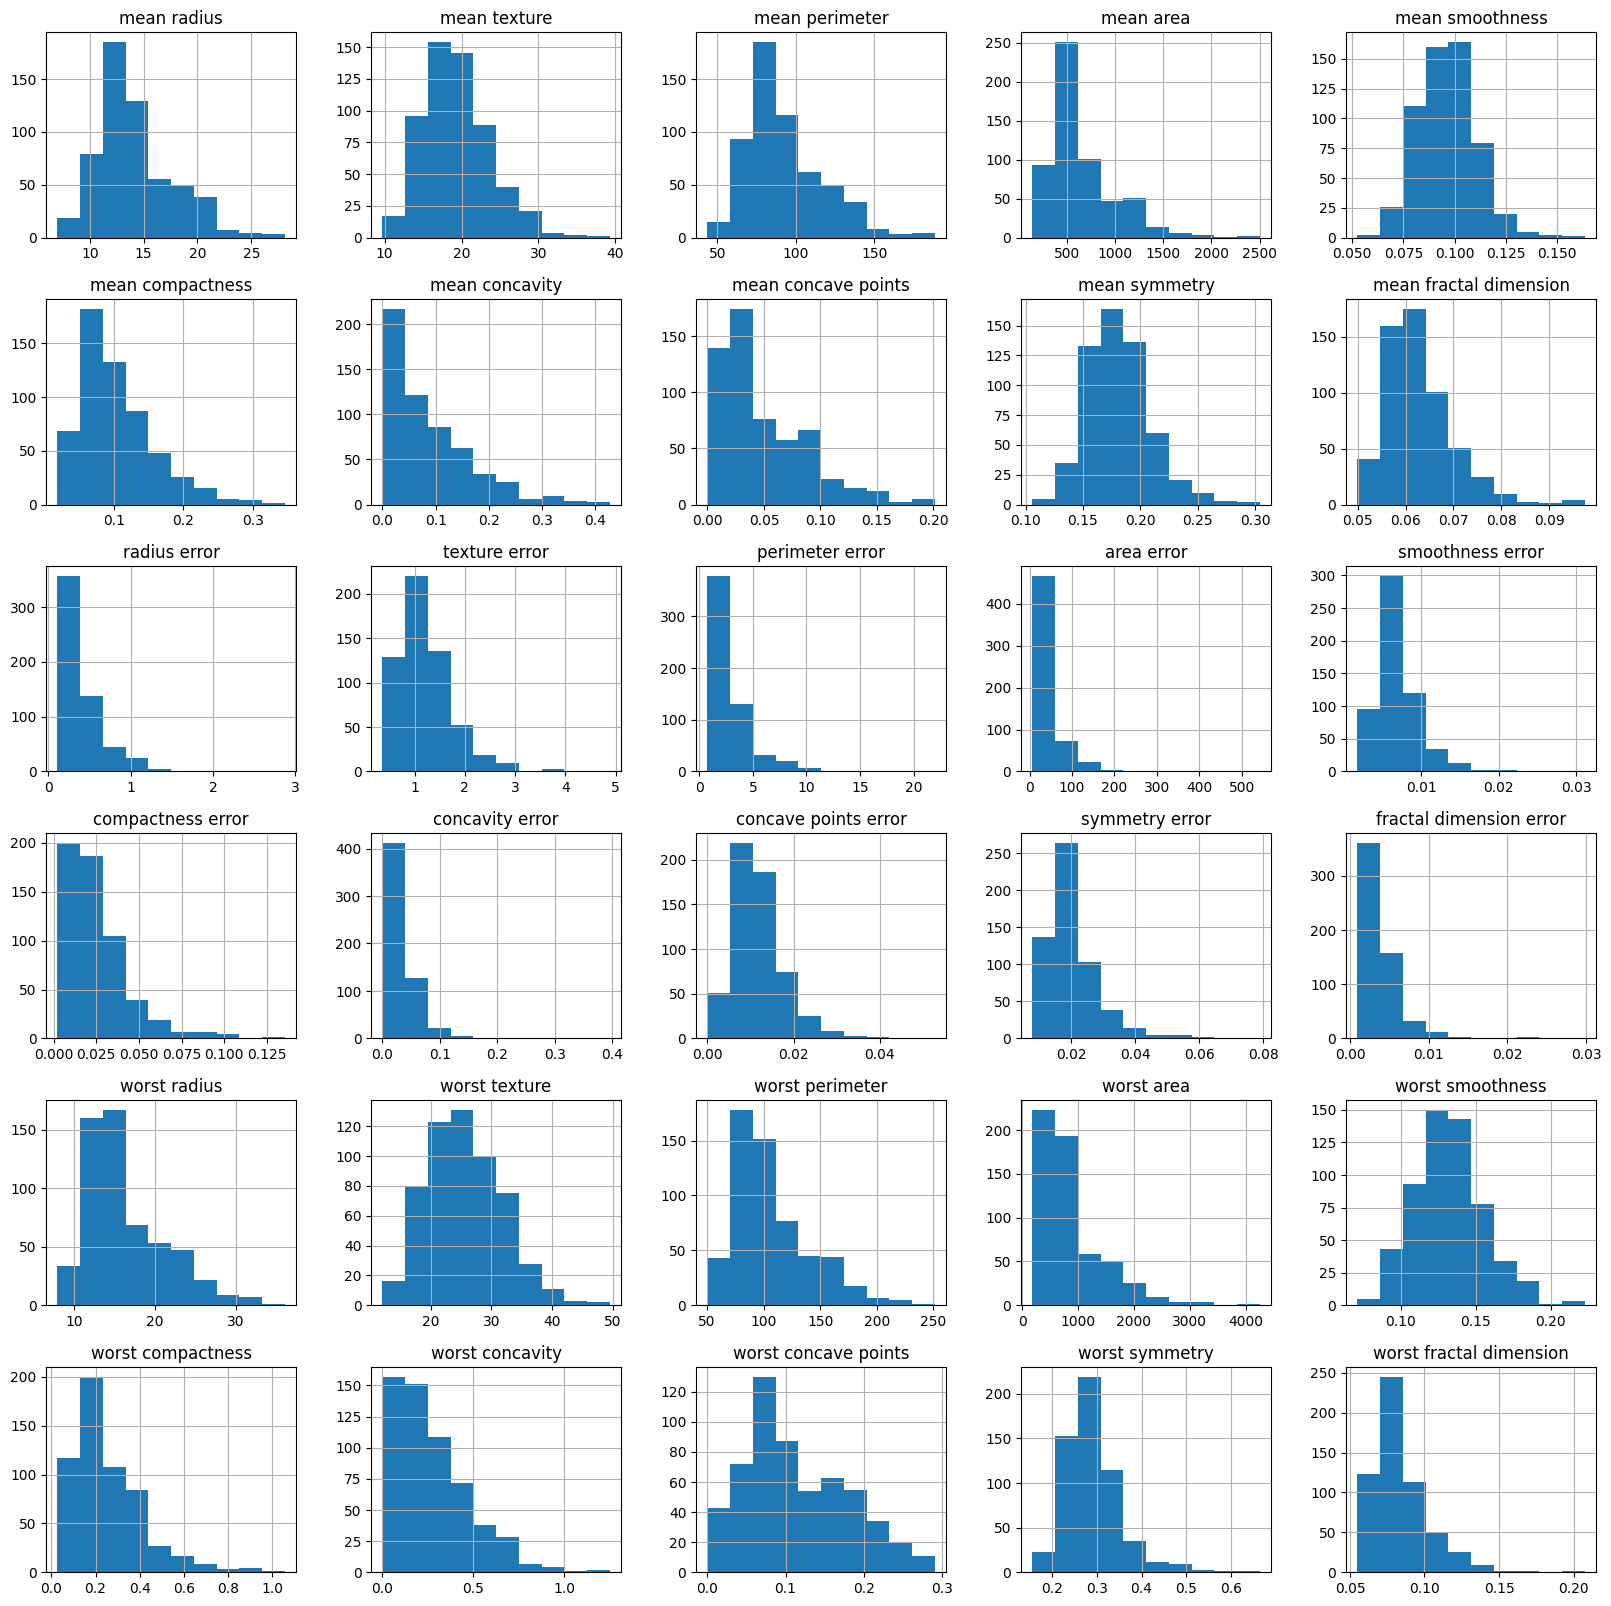

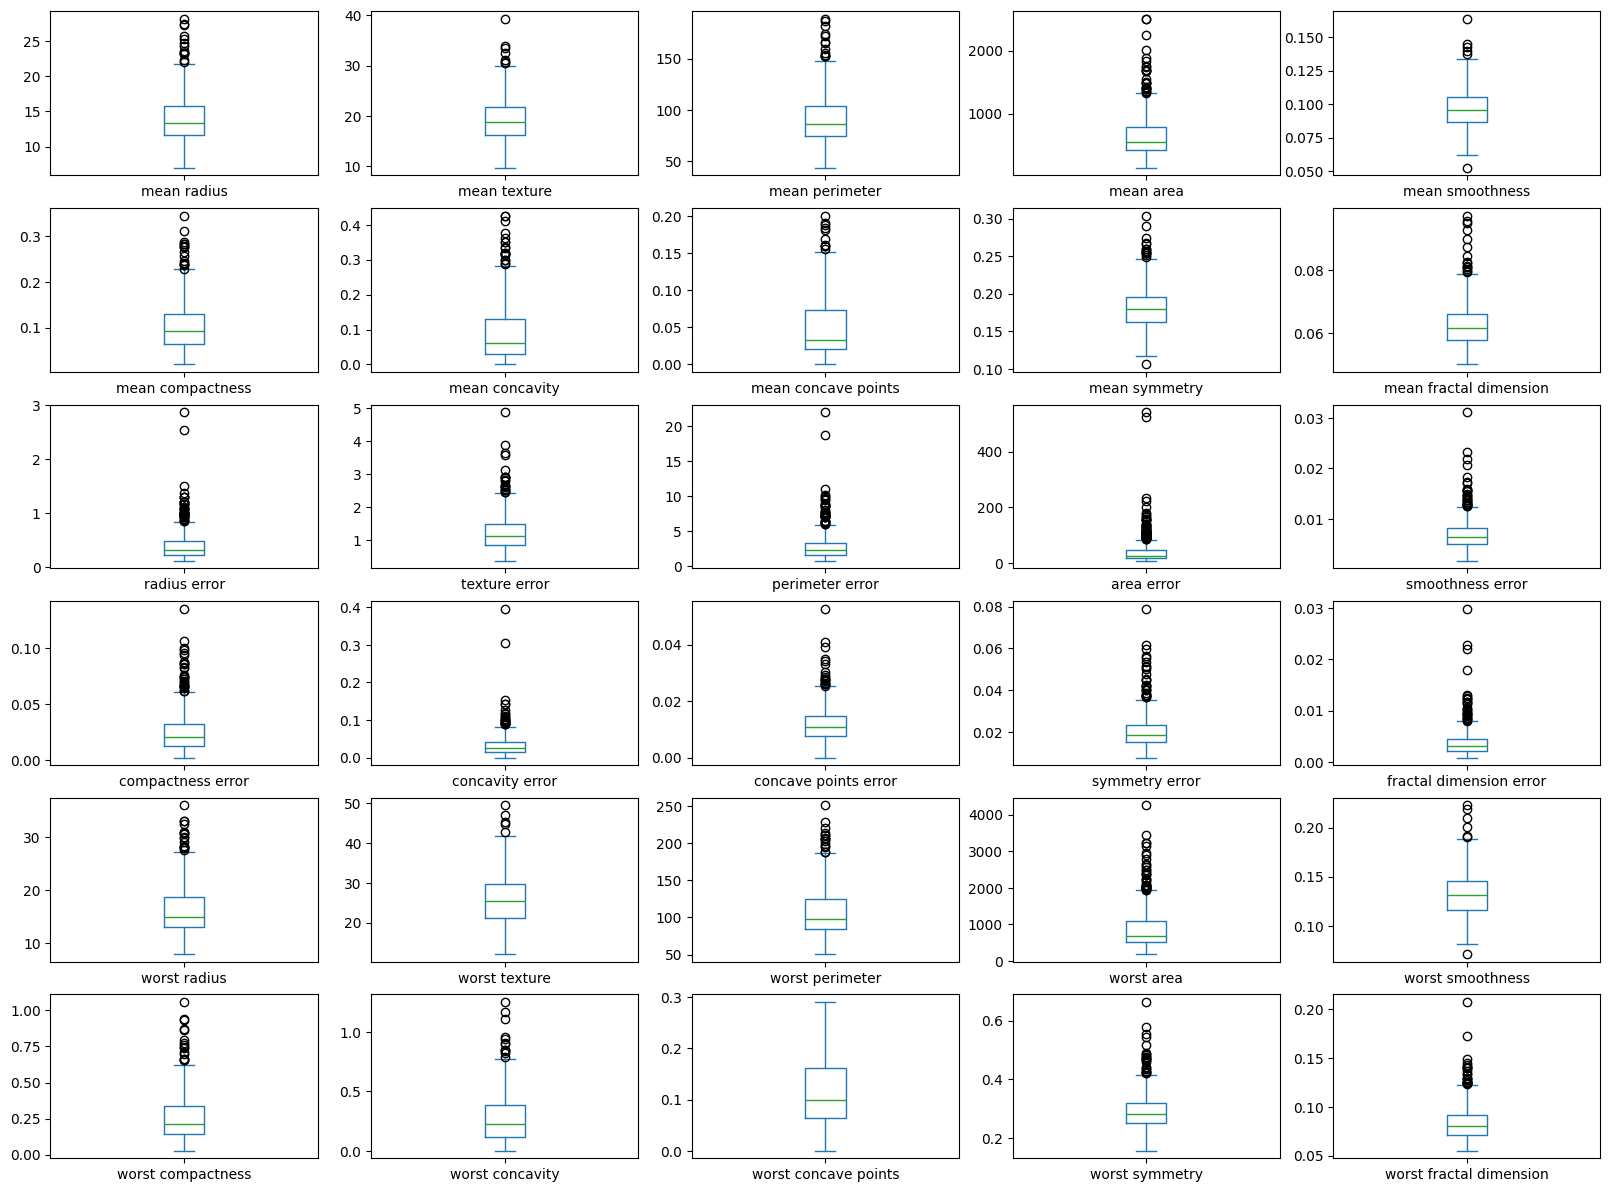

In [ ]:
# Create histograms for individual features
df_X.hist(figsize=(20, 20))
plt.show()

# Create box plots for individual features
df_X.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 20))
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the models
naive_bayes = GaussianNB()
svm = SVC()

# Define the hyperparameter grids for each model
param_grid_nb = {}  # No hyperparameters to tune for GaussianNB

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=5)
grid_search_nb.fit(X_train, y_train)

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Get the best models from the grid search
best_nb_model = grid_search_nb.best_estimator_
best_svm_model = grid_search_svm.best_estimator_


# Evaluate the performance of the best models on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = evaluate_model(best_nb_model, X_test, y_test)
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)


# Evaluate SVM
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(best_svm_model, X_test, y_test)
print("\nSupport Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)


Naive Bayes:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1-score: 0.9722222222222222

Support Vector Machine:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1-score: 0.9861111111111112


In [ ]:
# Ablation study: removing features and evaluating performance

# We'll remove features one by one and see how the performance changes
# For simplicity, we'll use the best SVM model from the previous code

feature_names = df.feature_names
original_accuracy = svm_accuracy

for i in range(X_train.shape[1]):
    # Create a copy of the training and testing data
    X_train_ablation = X_train.copy()
    X_test_ablation = X_test.copy()

    # Remove the ith feature from both training and testing data
    X_train_ablation = np.delete(X_train_ablation, i, axis=1)
    X_test_ablation = np.delete(X_test_ablation, i, axis=1)


    # Train the SVM model with the reduced feature set
    best_svm_model.fit(X_train_ablation, y_train)

    # Evaluate the model
    y_pred_ablation = best_svm_model.predict(X_test_ablation)
    ablation_accuracy = accuracy_score(y_test, y_pred_ablation)

    print(f"\nRemoving feature - {feature_names[i]}:")
    print("Accuracy:", ablation_accuracy)
    print("Difference from original accuracy:", original_accuracy - ablation_accuracy)


Removing feature - mean radius:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean texture:
Accuracy: 0.9736842105263158
Difference from original accuracy: 0.00877192982456132

Removing feature - mean perimeter:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean area:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean smoothness:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean compactness:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean concavity:
Accuracy: 0.9649122807017544
Difference from original accuracy: 0.01754385964912275

Removing feature - mean concave points:
Accuracy: 0.9824561403508771
Difference from original accuracy: 0.0

Removing feature - mean symmetry:
Accuracy: 0.9736842105263158
Difference from original accuracy: 0.00877192982456132

Removing feature -

I've learned that epochs are usually important in machine learning, especially for neural networks. Here's why I think they aren't used here:

Different Algorithms: This code uses Naive Bayes and SVM. They are different from neural networks and don't learn in the same iterative way. They usually find a solution in one go, without needing to repeat the training process.

No Gradient Descent: Epochs are usually needed when the algorithm uses gradient descent. This is a method where the model learns step-by-step by adjusting its settings to get better predictions. Naive Bayes and SVM don't work this way. They have other ways to find the best settings, so they don't need epochs.

Single Training: The code trains both Naive Bayes and SVM only once with the whole training data. There's no repetition or multiple passes (epochs) like in neural networks.

Hyperparameters: We do adjust some settings called hyperparameters using GridSearchCV. This is to find the best combination for the model to perform well, but it's not about controlling how many times the model sees the data (epochs).

Therefore, epochs are not really needed in this specific code because the algorithms and their training process are inherently different from those that typically use epochs.